In [1]:
# define logging and working directory
from ProjectRoot import change_wd_to_project_root 
change_wd_to_project_root()
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from src.utils.notebook_imports import *
Console_and_file_logger('Clean_Repo')

search for root_dir and set working directory
Working directory set to: /mnt/data/git/cardio


2020-06-12 10:23:38,560 INFO -------------------- Start --------------------
2020-06-12 10:23:38,563 INFO Working directory: /mnt/data/git/cardio.
2020-06-12 10:23:38,563 INFO Log file: ./logs/Clean_Repo.log
2020-06-12 10:23:38,563 INFO Log level for console: INFO


# Create a 2D dataframe 
## Extract the t and z position from the filenames
## normalize labeled timesteps to values between 0 and 5
## Filter all patients with less than 5 labeled timesteps
 

In [16]:
# GCN & ACDC DATA
kfold_data_dir = 'reports/kfolds_data/2D/gcn/df_kfold.csv'
df_folds = pd.read_csv(kfold_data_dir)


In [17]:
df_folds.head()

,Unnamed: 0,fold,x_path,y_path,modality,patient
0,0,3,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,train,0019-1EMMCVKN-2006-06-29
1,1,3,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,train,0019-1EMMCVKN-2006-06-29
2,2,3,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,train,0019-1EMMCVKN-2006-06-29
3,3,3,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,train,0019-1EMMCVKN-2006-06-29
4,4,3,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,train,0019-1EMMCVKN-2006-06-29


In [18]:
from src.data.dataset import *
df_folds['t'] = df_folds['x_path'].map(get_t_position_from_filename)
df_folds['z'] = df_folds['x_path'].map(get_z_position_from_filename)

In [19]:
df_folds.head()

,Unnamed: 0,fold,x_path,y_path,modality,patient,t,z
0,0,3,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,train,0019-1EMMCVKN-2006-06-29,13,0
1,1,3,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,train,0019-1EMMCVKN-2006-06-29,13,10
2,2,3,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,train,0019-1EMMCVKN-2006-06-29,13,11
3,3,3,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,train,0019-1EMMCVKN-2006-06-29,13,1
4,4,3,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,data/raw/GCN/2D/test/0019-1EMMCVKN-2006-06-29_...,train,0019-1EMMCVKN-2006-06-29,13,2


In [20]:
def norm_t(df):
    
    patients = []
    for p in sorted(df_folds['patient'].unique()):
        # slice all rows of this patient
        df_patient_temp = df_folds[df_folds['patient'] == p].copy()
        # get a ordered list of timesteps for this patient
        relative_t = sorted(df_patient_temp['t'].unique())
        # create a dict with replacement values
        replace = {key:value for key, value in zip(relative_t, np.arange(len(relative_t)))}
        # create a normalized timestep column from the current t and the replacement dict
        df_patient_temp['t_norm'] = df_patient_temp['t'].replace(to_replace=replace)
        patients.append(df_patient_temp)
    return pd.concat(patients)

df_folds = norm_t(df_folds)

In [21]:
df_folds = df_folds.loc[:, ~df_folds.columns.str.contains('^Unnamed')]

In [22]:
df_folds.head()

,fold,x_path,y_path,modality,patient,t,z,t_norm
1690,3,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,train,0003-04NEJQUZ-2007-03-13,12,0,1
1691,3,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,train,0003-04NEJQUZ-2007-03-13,12,10,1
1692,3,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,train,0003-04NEJQUZ-2007-03-13,12,11,1
1693,3,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,train,0003-04NEJQUZ-2007-03-13,12,12,1
1694,3,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,train,0003-04NEJQUZ-2007-03-13,12,13,1


In [23]:
df_folds.to_csv('reports/kfolds_data/2D/gcn/df_kfold.csv')

In [24]:
df_folds = pd.read_csv('reports/kfolds_data/2D/gcn/df_kfold.csv')

In [25]:
df_fold = df_folds[df_folds['fold'] == 0]

In [26]:
df_fold.shape

(14344, 9)

In [27]:
df_fold[df_fold['t_norm'] == 0]['x_path'].shape

(2903,)

In [28]:
df_fold[df_fold['t_norm'] == 1]['x_path'].shape

(2867,)

In [29]:
df_folds['t_norm'].unique()

array([1, 2, 3, 4, 0, 5])

# Some patients have more than 5 labeled timesteps
# we need to drop them

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf91377d68>]],
      dtype=object)

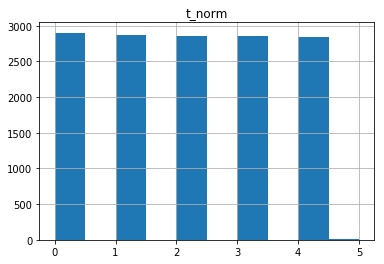

In [30]:
df_fold[['t_norm']].hist()

In [31]:
# filter patients with len(t_norm.unique()) != 5
df_temp = df_fold.apply(lambda x : (len(df_fold[df_fold['patient'] == x['patient']]['t_norm'].unique()) != 5), axis=1)

In [32]:
# how many patients do we have?
df_fold.shape
len(df_fold.patient.unique())

209

In [33]:
# how many patients with 5 labelled timesteps do we have?, difference have more or less timesteps
df = df_fold[~df_temp]
len(df.patient.unique())

203

In [34]:
df[df['t_norm'] == 0]['x_path'].shape
df[df['t_norm'] == 1]['x_path'].shape
df[df['t_norm'] == 2]['x_path'].shape
df[df['t_norm'] == 3]['x_path'].shape
df[df['t_norm'] == 4]['x_path'].shape

(2826,)

In [35]:
df.to_csv('reports/motion/2D/gcn/only_2d_slices_with_5_timesteps.csv')

In [36]:
df.head()

,Unnamed: 0,fold,x_path,y_path,modality,patient,t,z,t_norm
240,44142,0,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,train,0003-04NEJQUZ-2007-03-13,12,0,1
241,44143,0,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,train,0003-04NEJQUZ-2007-03-13,12,10,1
242,44144,0,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,train,0003-04NEJQUZ-2007-03-13,12,11,1
243,44145,0,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,train,0003-04NEJQUZ-2007-03-13,12,12,1
244,44146,0,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,data/raw/GCN/2D/train/0003-04NEJQUZ-2007-03-13...,train,0003-04NEJQUZ-2007-03-13,12,13,1


# Create a motiongenerator from dataframe --> train voxelmorph

In [40]:
from src.data.generators import MotionDataGenerator
# create a list of z slices with t_n and t_n+1 , not possible for the last timestep
t_1 = np.concatenate([df[df['t_norm'] == 0]['x_path'].values, df[df['t_norm'] == 1]['x_path'].values, df[df['t_norm'] == 2]['x_path'].values, df[df['t_norm'] == 3]['x_path'].values])
t_2 = np.concatenate([df[df['t_norm'] == 1]['x_path'].values, df[df['t_norm'] == 2]['x_path'].values, df[df['t_norm'] == 3]['x_path'].values, df[df['t_norm'] == 4]['x_path'].values])
batch_generator = MotionDataGenerator(t_1, t_2)

2019-10-01 15:48:23,385 INFO Create DataGenerator
2019-10-01 15:48:23,417 INFO Datagenerator created with: 
 shape: [256, 256]
 batchsize: 32
 Scaler: MinMax
 Images: 10764 
 Augment_grid: False 
 Thread workers: 32
2019-10-01 15:48:23,417 INFO No augmentation


In [41]:
len(t_1)

10764

In [42]:
logging.getLogger().setLevel(logging.INFO)
from src.visualization.visualize import show_2D_or_3D

In [4]:
# Select batch generator output
x = ''
y = ''
@interact
def select_batch(batch = (0,len(batch_generator), 1)):
    global x, y
    input_ , output_ = batch_generator.__getitem__(batch)
    x = input_[0]
    y = output_[0]
    logging.info(x.shape)
    logging.info(y.shape)

interactive(children=(IntSlider(value=2691, description='batch', max=5382), Output()), _dom_classes=('widget-i…

In [5]:
@interact
def select_image_in_batch(im = (0,x.shape[0]- 1, 1)):
    
    # define a different logging level to make the generator steps visible
    logging.getLogger().setLevel(logging.INFO)
    show_2D_or_3D(x[im])
    plt.show()
    show_2D_or_3D(y[im])
    plt.show()

interactive(children=(IntSlider(value=0, description='im', max=1), Output()), _dom_classes=('widget-interact',…

# Create 2D slices from 3D slices with any filename structure

In [8]:
from src.data.Dataset import create_2d_slices_from_3d_volume_files_any_filename

In [9]:
# select the folder with the *img.nrrd and *msk.nrrd 3D files
from ipyfilechooser import FileChooser
chooser = FileChooser(os.path.join(os.getcwd(),'data/'), '')
display(chooser)

FileChooser(path='/mnt/data/git/cardio/data', filename='', show_hidden='False')

In [12]:
data_path = chooser.selected
masks = sorted(glob.glob(os.path.join(data_path,'*msk.nrrd')))
images = sorted(glob.glob(os.path.join(data_path,'*img.nrrd')))
print('masks: {}'.format(len(masks)))
print('images: {}'.format(len(images)))

masks: 429
images: 429


In [13]:
export_dir = 'data/raw/gcn_05_2020_ax_sax_86/SAX_2D/'
temp = [create_2d_slices_from_3d_volume_files_any_filename(img, msk, export_dir) for img, msk in zip(images, masks)]

In [15]:
from src.data.Dataset import get_kfolded_data
df = get_kfolded_data(kfolds=4, path_to_data='data/raw/gcn_05_2020_ax_sax_86/SAX_3D')

In [33]:
df = df.drop_duplicates(subset=['fold', 'modality', 'patient'],keep='first')[['fold', 'modality', 'patient']].sort_values('patient')

In [38]:
df.to_csv('data/raw/gcn_05_2020_ax_sax_86/folds.csv', index=False)

In [39]:
patients = pd.read_csv('data/raw/gcn_05_2020_ax_sax_86/folds.csv')
patients = patients[patients.fold.isin([0])]['patient'].values
patients.shape

(86,)

In [ ]:
df = pd.read_csv('data/raw/gcn_05_2020_ax_sax_86/')

# Load df fold and filter files by the patient id of one fold

In [79]:
# Define a data path
from ipyfilechooser import FileChooser
chooser = FileChooser(os.path.join(os.getcwd(),'data/raw'), '')
display(chooser)

FileChooser(path='/mnt/data/git/cardio/data/raw', filename='', show_hidden='False')

In [83]:
from src.data.Dataset import get_trainings_files

x,y, x_, y_ = get_trainings_files(chooser.selected)

2020-06-15 08:22:24,158 INFO Found 6190 images/masks in /mnt/data/git/cardio/data/raw/gcn_05_2020_ax_sax_86/SAX_2D/
2020-06-15 08:22:24,340 INFO Selected 4605 of 6190 files with 64 of 86 patients for training fold 0
